In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import pandas as pd

class FeatureVisualizer:
    def __init__(self, feature_file='extracted_features.pickle'):
        """Initialize visualizer with extracted features."""
        with open(feature_file, 'rb') as f:
            self.features = pickle.load(f)
            
    def _create_feature_df(self, feature_type='spatter', threshold=None):
        """Convert hierarchical feature dict to flat DataFrame."""
        rows = []
        for cube, condition, line in product(
            self.features.keys(),
            self.features[1].keys(),
            self.features[1][1].keys()
        ):
            try:
                if feature_type == 'spatter':
                    features = self.features[cube][condition][line]['spatter']
                else:  # area
                    features = self.features[cube][condition][line]['area'][threshold]
                
                row = {
                    'cube': cube,
                    'condition': condition,
                    'line': line,
                    **features
                }
                rows.append(row)
            except KeyError:
                continue
                
        return pd.DataFrame(rows)
    
    def plot_feature_heatmap(self, feature_type='spatter', threshold=50):
        """Plot heatmap of feature correlations."""
        df = self._create_feature_df(feature_type, threshold)
        features = [col for col in df.columns if col not in ['cube', 'condition', 'line']]
        
        plt.figure(figsize=(12, 10))
        sns.heatmap(df[features].corr(), annot=True, cmap='RdBu_r', center=0)
        title = f'Feature Correlations - {feature_type.capitalize()}'
        if feature_type == 'area':
            title += f' (Threshold {threshold})'
        plt.title(title)
        plt.tight_layout()
        return plt.gcf()
    
    def plot_feature_distributions(self, feature_type='spatter', threshold=50):
        """Plot distribution of each feature."""
        df = self._create_feature_df(feature_type, threshold)
        features = [col for col in df.columns if col not in ['cube', 'condition', 'line']]
        
        n_features = len(features)
        n_cols = 3
        n_rows = (n_features + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
        axes = axes.flatten()
        
        for ax, feature in zip(axes, features):
            sns.boxplot(data=df, x='condition', y=feature, ax=ax)
            ax.set_title(f'{feature} by Condition')
            ax.tick_params(axis='x', rotation=45)
            
        for ax in axes[len(features):]:
            ax.remove()
            
        title = f'Feature Distributions - {feature_type.capitalize()}'
        if feature_type == 'area':
            title += f' (Threshold {threshold})'
        plt.suptitle(title, y=1.02, fontsize=16)
        plt.tight_layout()
        return plt.gcf()
    
    def plot_condition_comparison(self, feature, feature_type='spatter', threshold=50):
        """Plot detailed comparison of a specific feature across conditions."""
        df = self._create_feature_df(feature_type, threshold)
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Boxplot for each condition, grouped by cube
        sns.boxplot(data=df, x='condition', y=feature, hue='cube', ax=ax1)
        ax1.set_title(f'{feature} by Condition and Cube')
        ax1.tick_params(axis='x', rotation=45)
        
        # Heatmap of mean values
        pivot_df = df.pivot_table(
            values=feature,
            index='cube',
            columns='condition',
            aggfunc='mean'
        )
        sns.heatmap(pivot_df, annot=True, fmt='.2f', cmap='viridis', ax=ax2)
        ax2.set_title(f'Mean {feature} by Cube and Condition')
        
        title = f'{feature} Analysis - {feature_type.capitalize()}'
        if feature_type == 'area':
            title += f' (Threshold {threshold})'
        plt.suptitle(title, y=1.02, fontsize=16)
        plt.tight_layout()
        return plt.gcf()
    
    def plot_threshold_comparison(self, feature, condition=1):
        """Compare feature values across different thresholds for a specific condition."""
        thresholds = list(self.features[1][1][1]['area'].keys())
        data = []
        
        for threshold in thresholds:
            df = self._create_feature_df('area', threshold)
            df = df[df['condition'] == condition].copy()
            df['threshold'] = threshold
            data.append(df)
            
        combined_df = pd.concat(data)
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Boxplot for each threshold
        sns.boxplot(data=combined_df, x='threshold', y=feature, ax=ax1)
        ax1.set_title(f'{feature} by Threshold (Condition {condition})')
        ax1.tick_params(axis='x', rotation=45)
        
        # Line plot of means with error bands
        sns.lineplot(
            data=combined_df,
            x='threshold',
            y=feature,
            hue='cube',
            ax=ax2
        )
        ax2.set_title(f'Mean {feature} by Threshold and Cube')
        
        plt.suptitle(f'Threshold Analysis - {feature} (Condition {condition})',
                    y=1.02, fontsize=16)
        plt.tight_layout()
        return plt.gcf()




In [2]:
import pickle
visualizer = FeatureVisualizer()
    

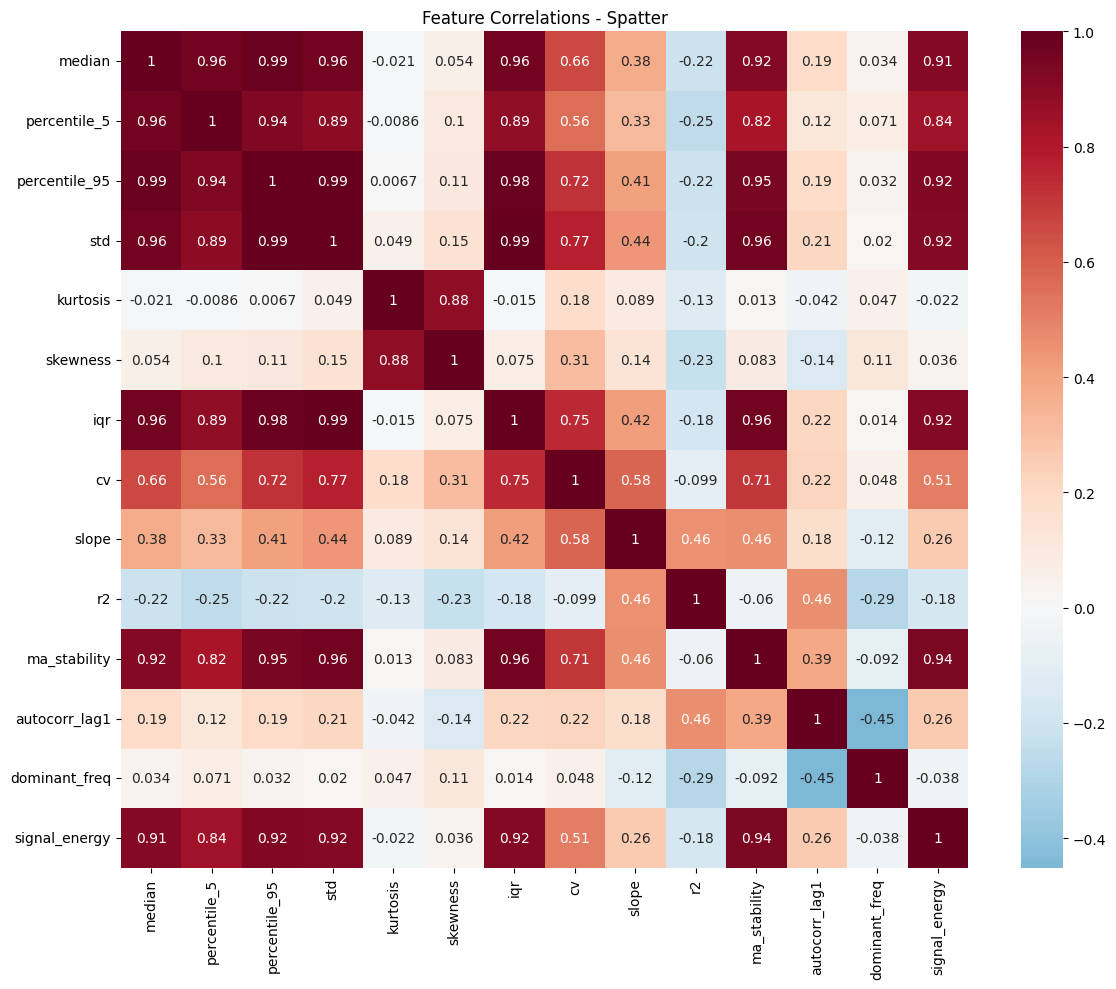

In [3]:
# Look at correlations between spatter features
visualizer.plot_feature_heatmap(feature_type='spatter')
plt.show()

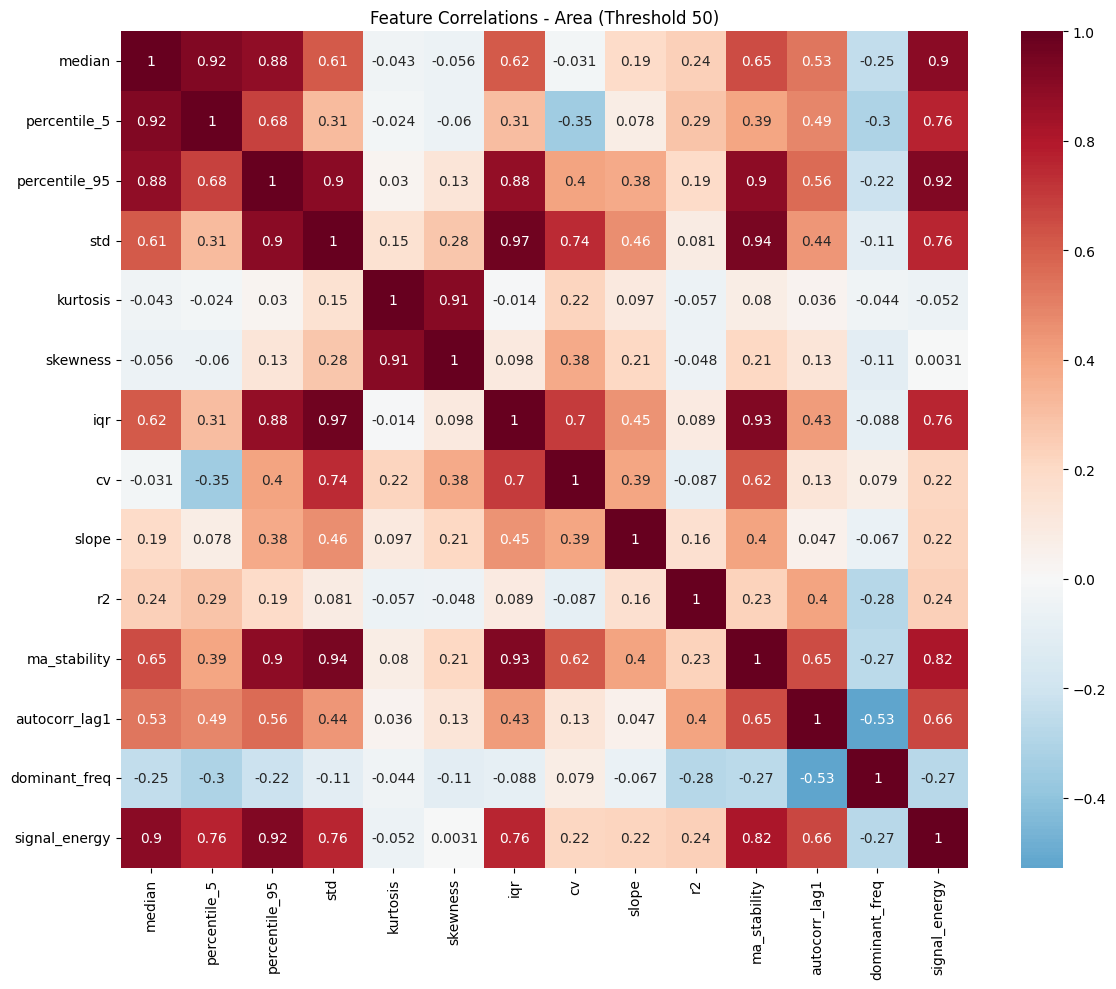

In [4]:
# Look at correlations between area features
visualizer.plot_feature_heatmap(feature_type='area')
plt.show()

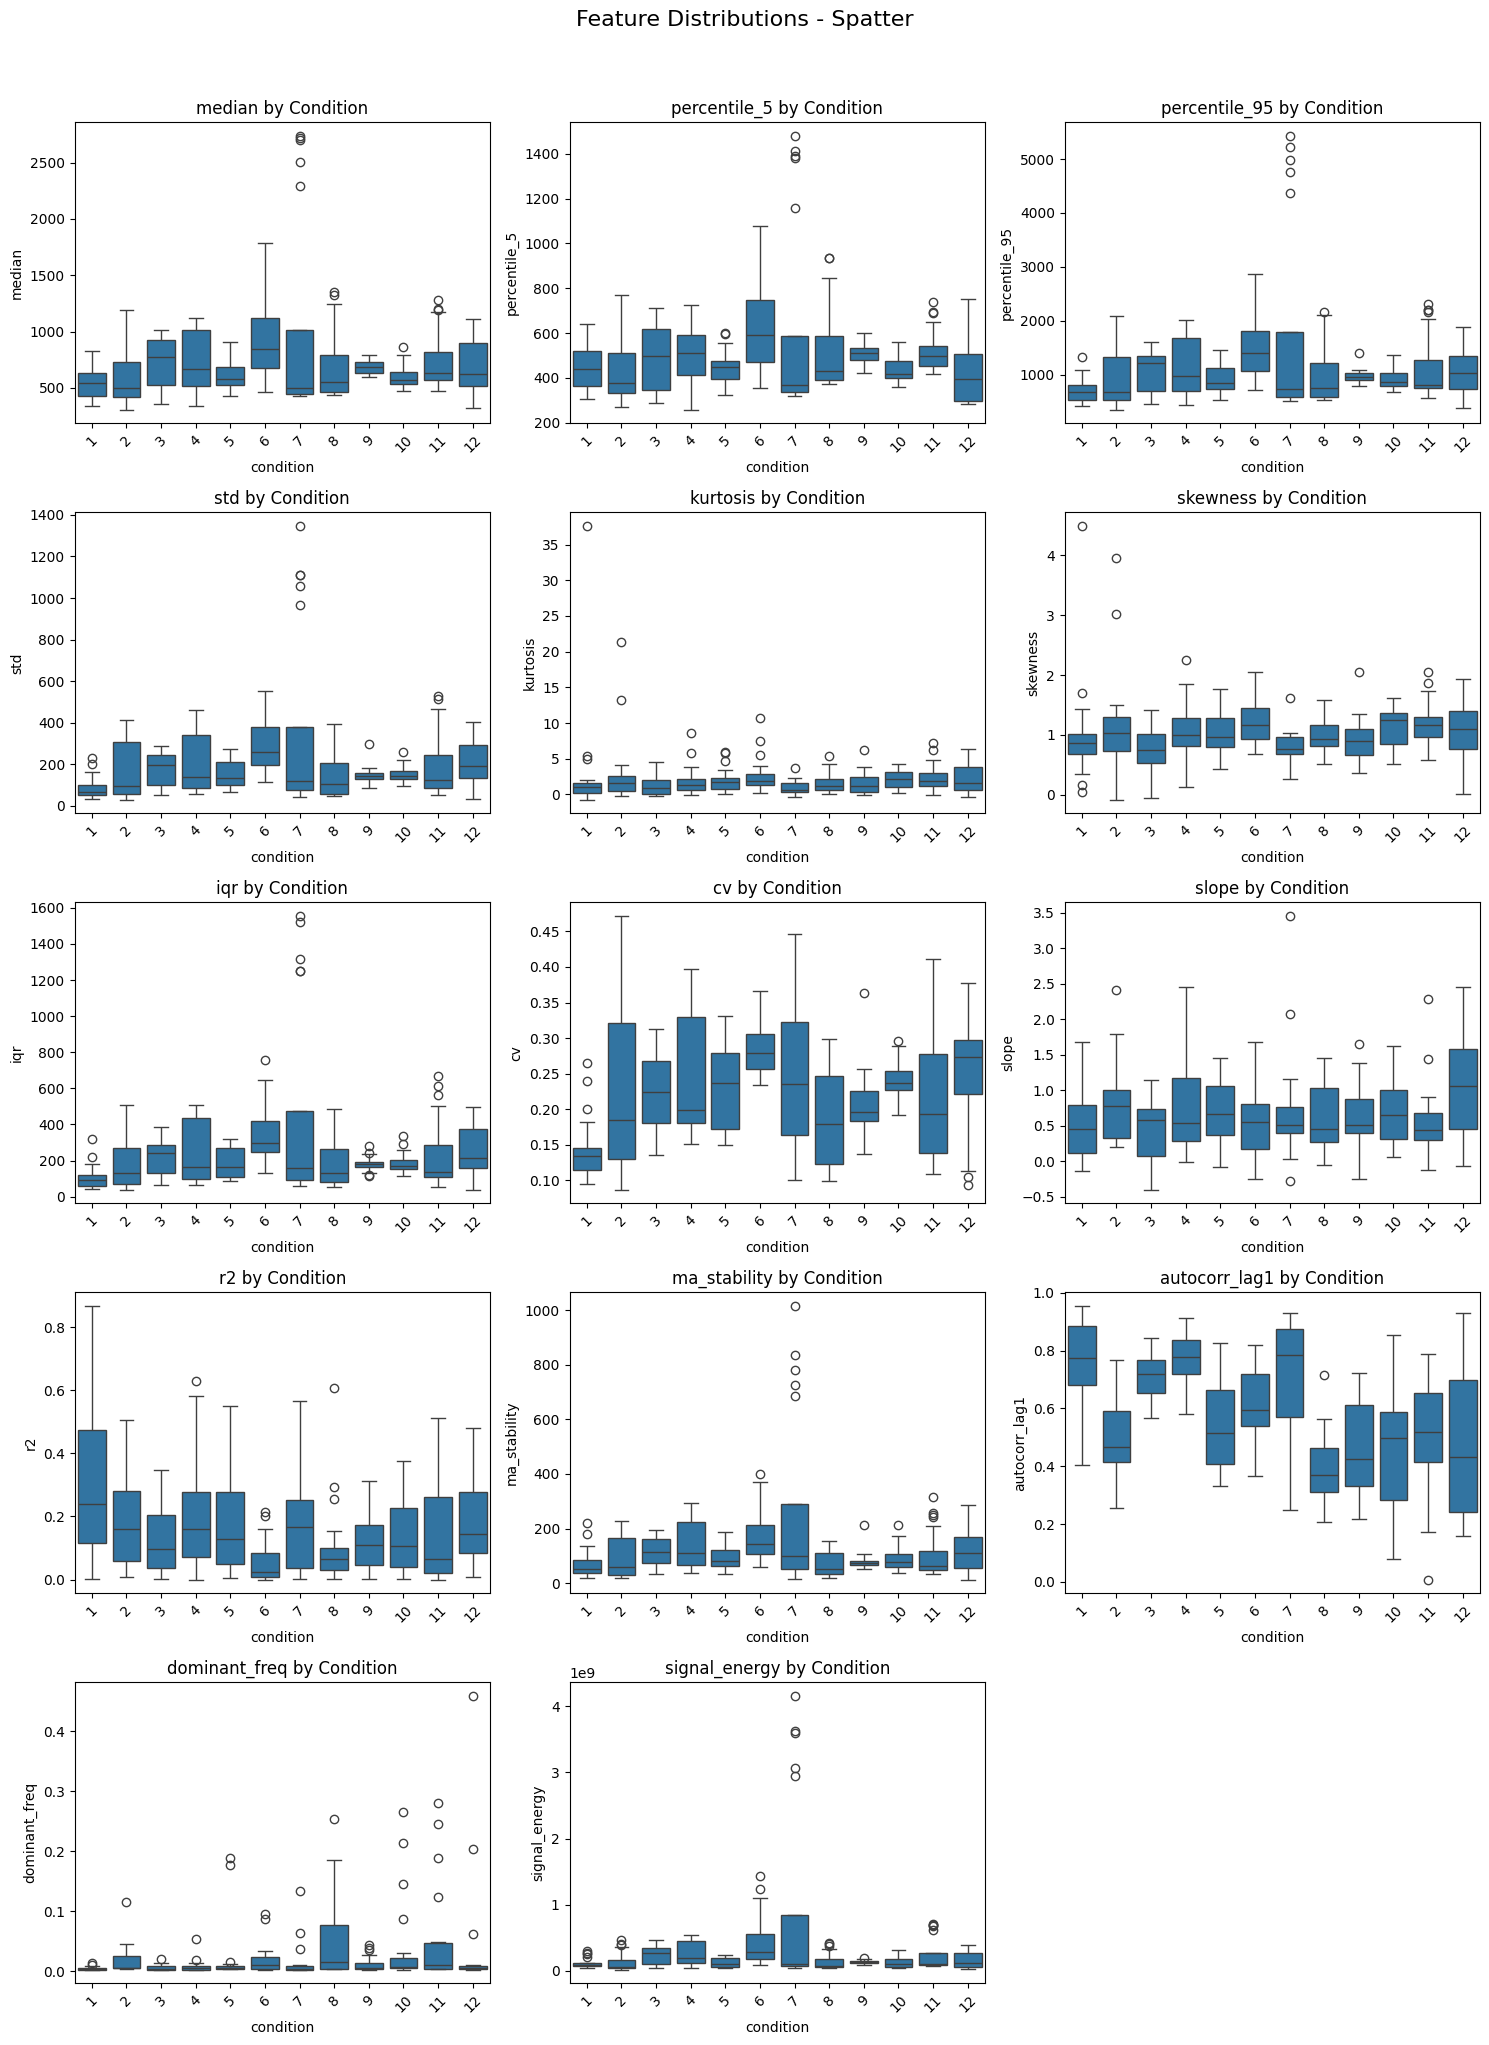

In [5]:
# See how features are distributed across conditions
visualizer.plot_feature_distributions(feature_type='spatter')
plt.show()

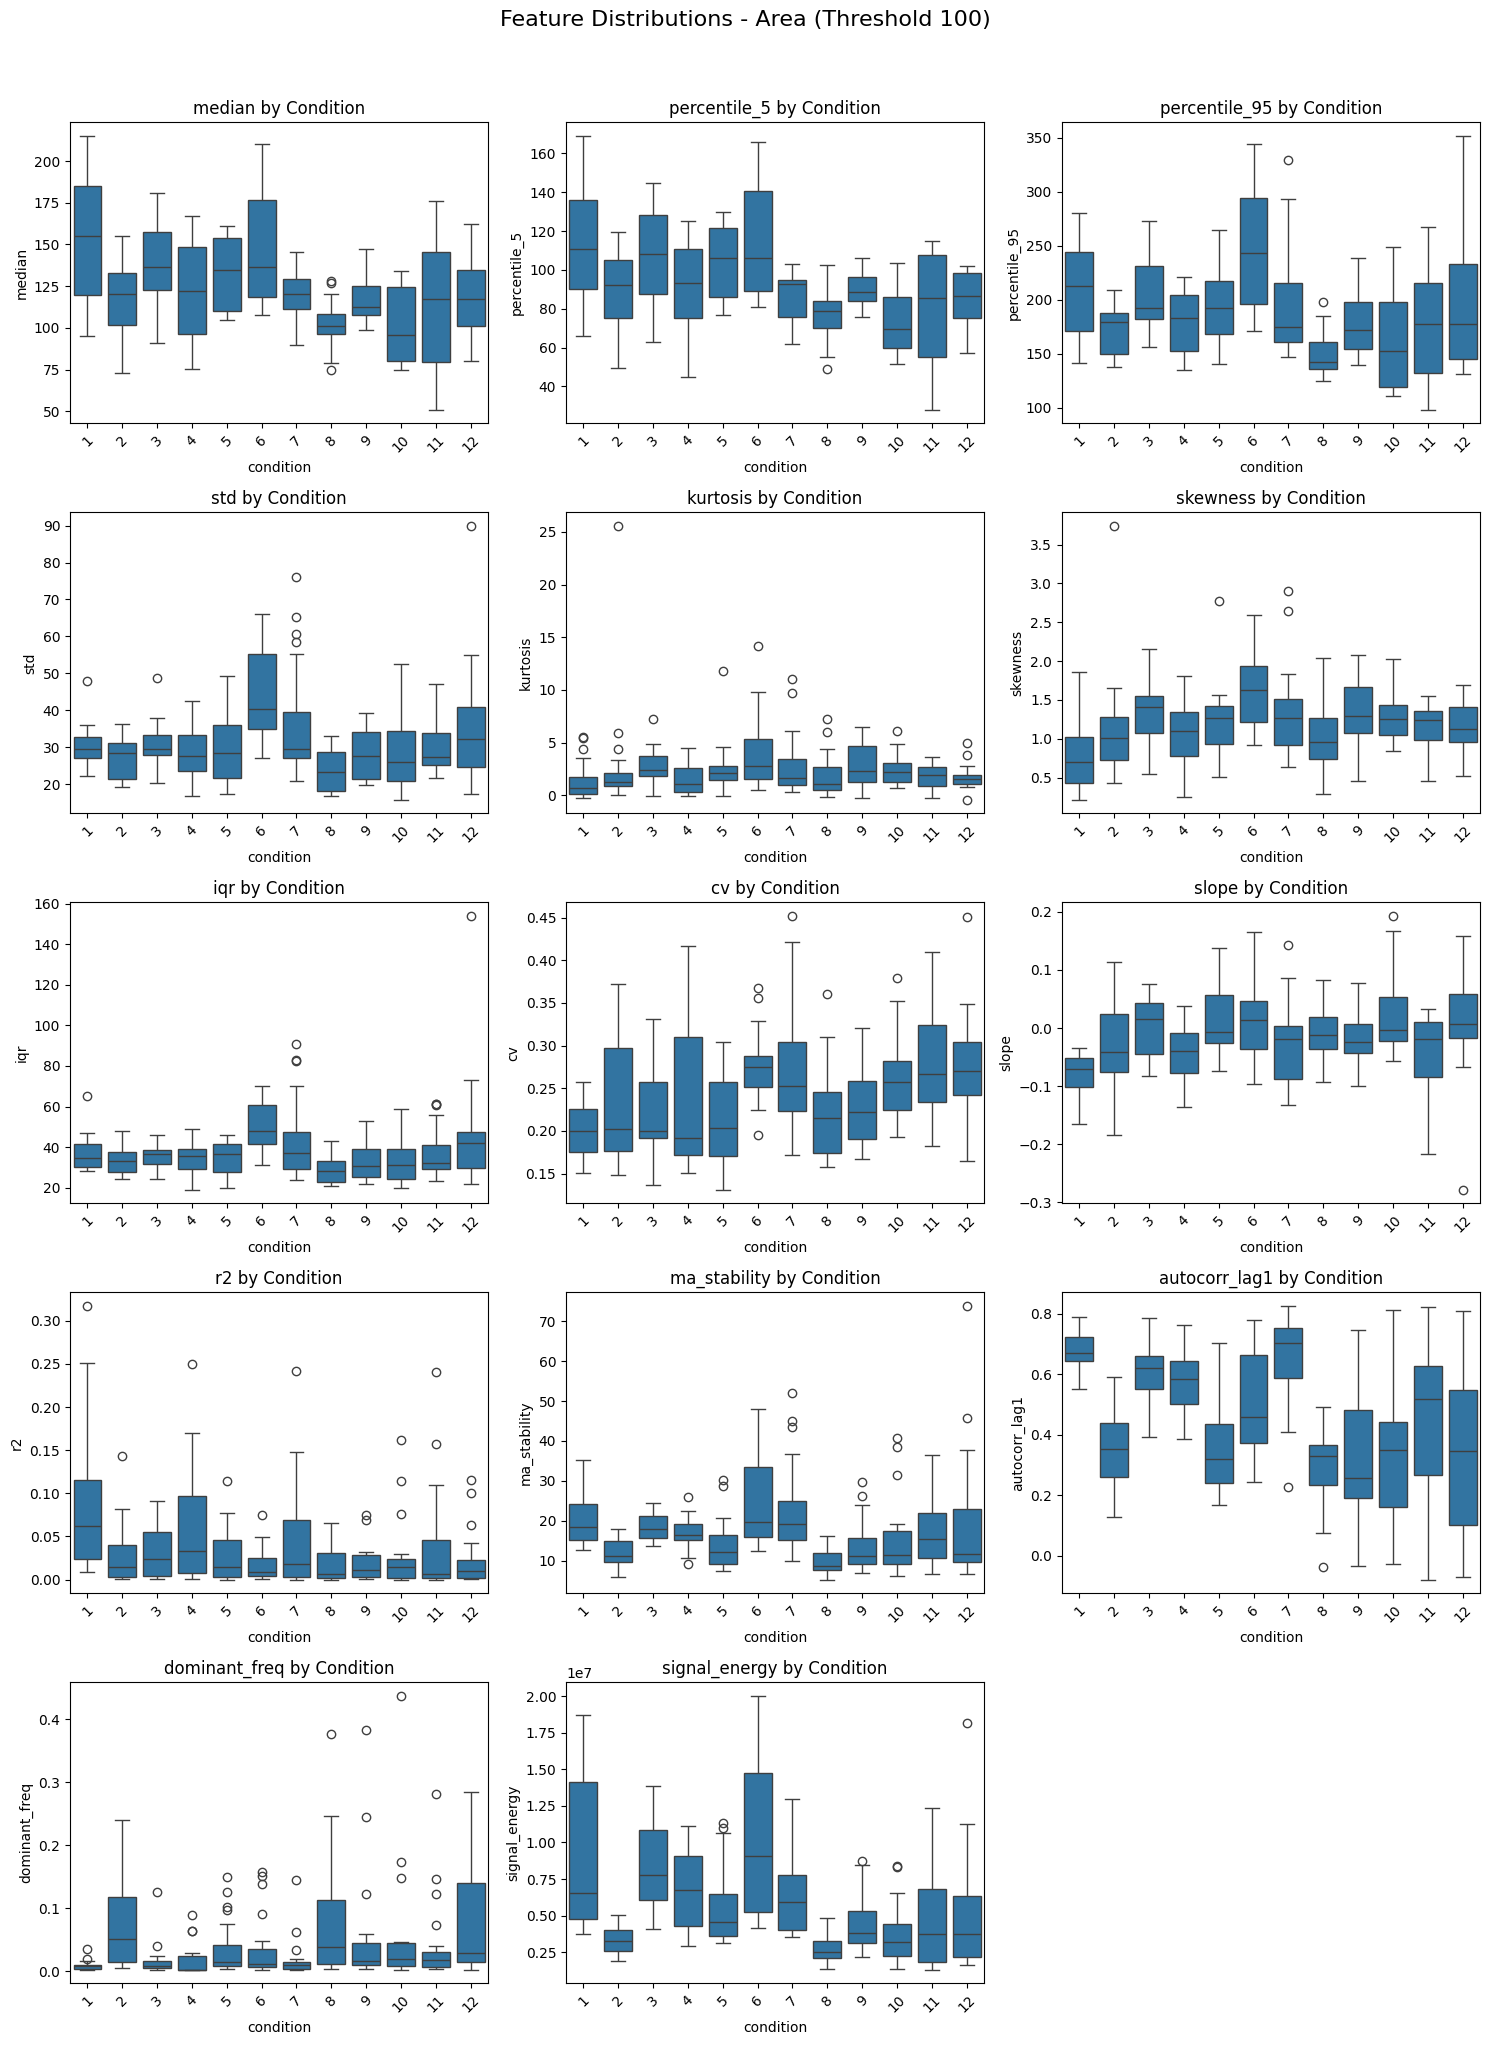

In [6]:
# See how features are distributed across conditions
visualizer.plot_feature_distributions(feature_type='area', threshold=100)
plt.show()

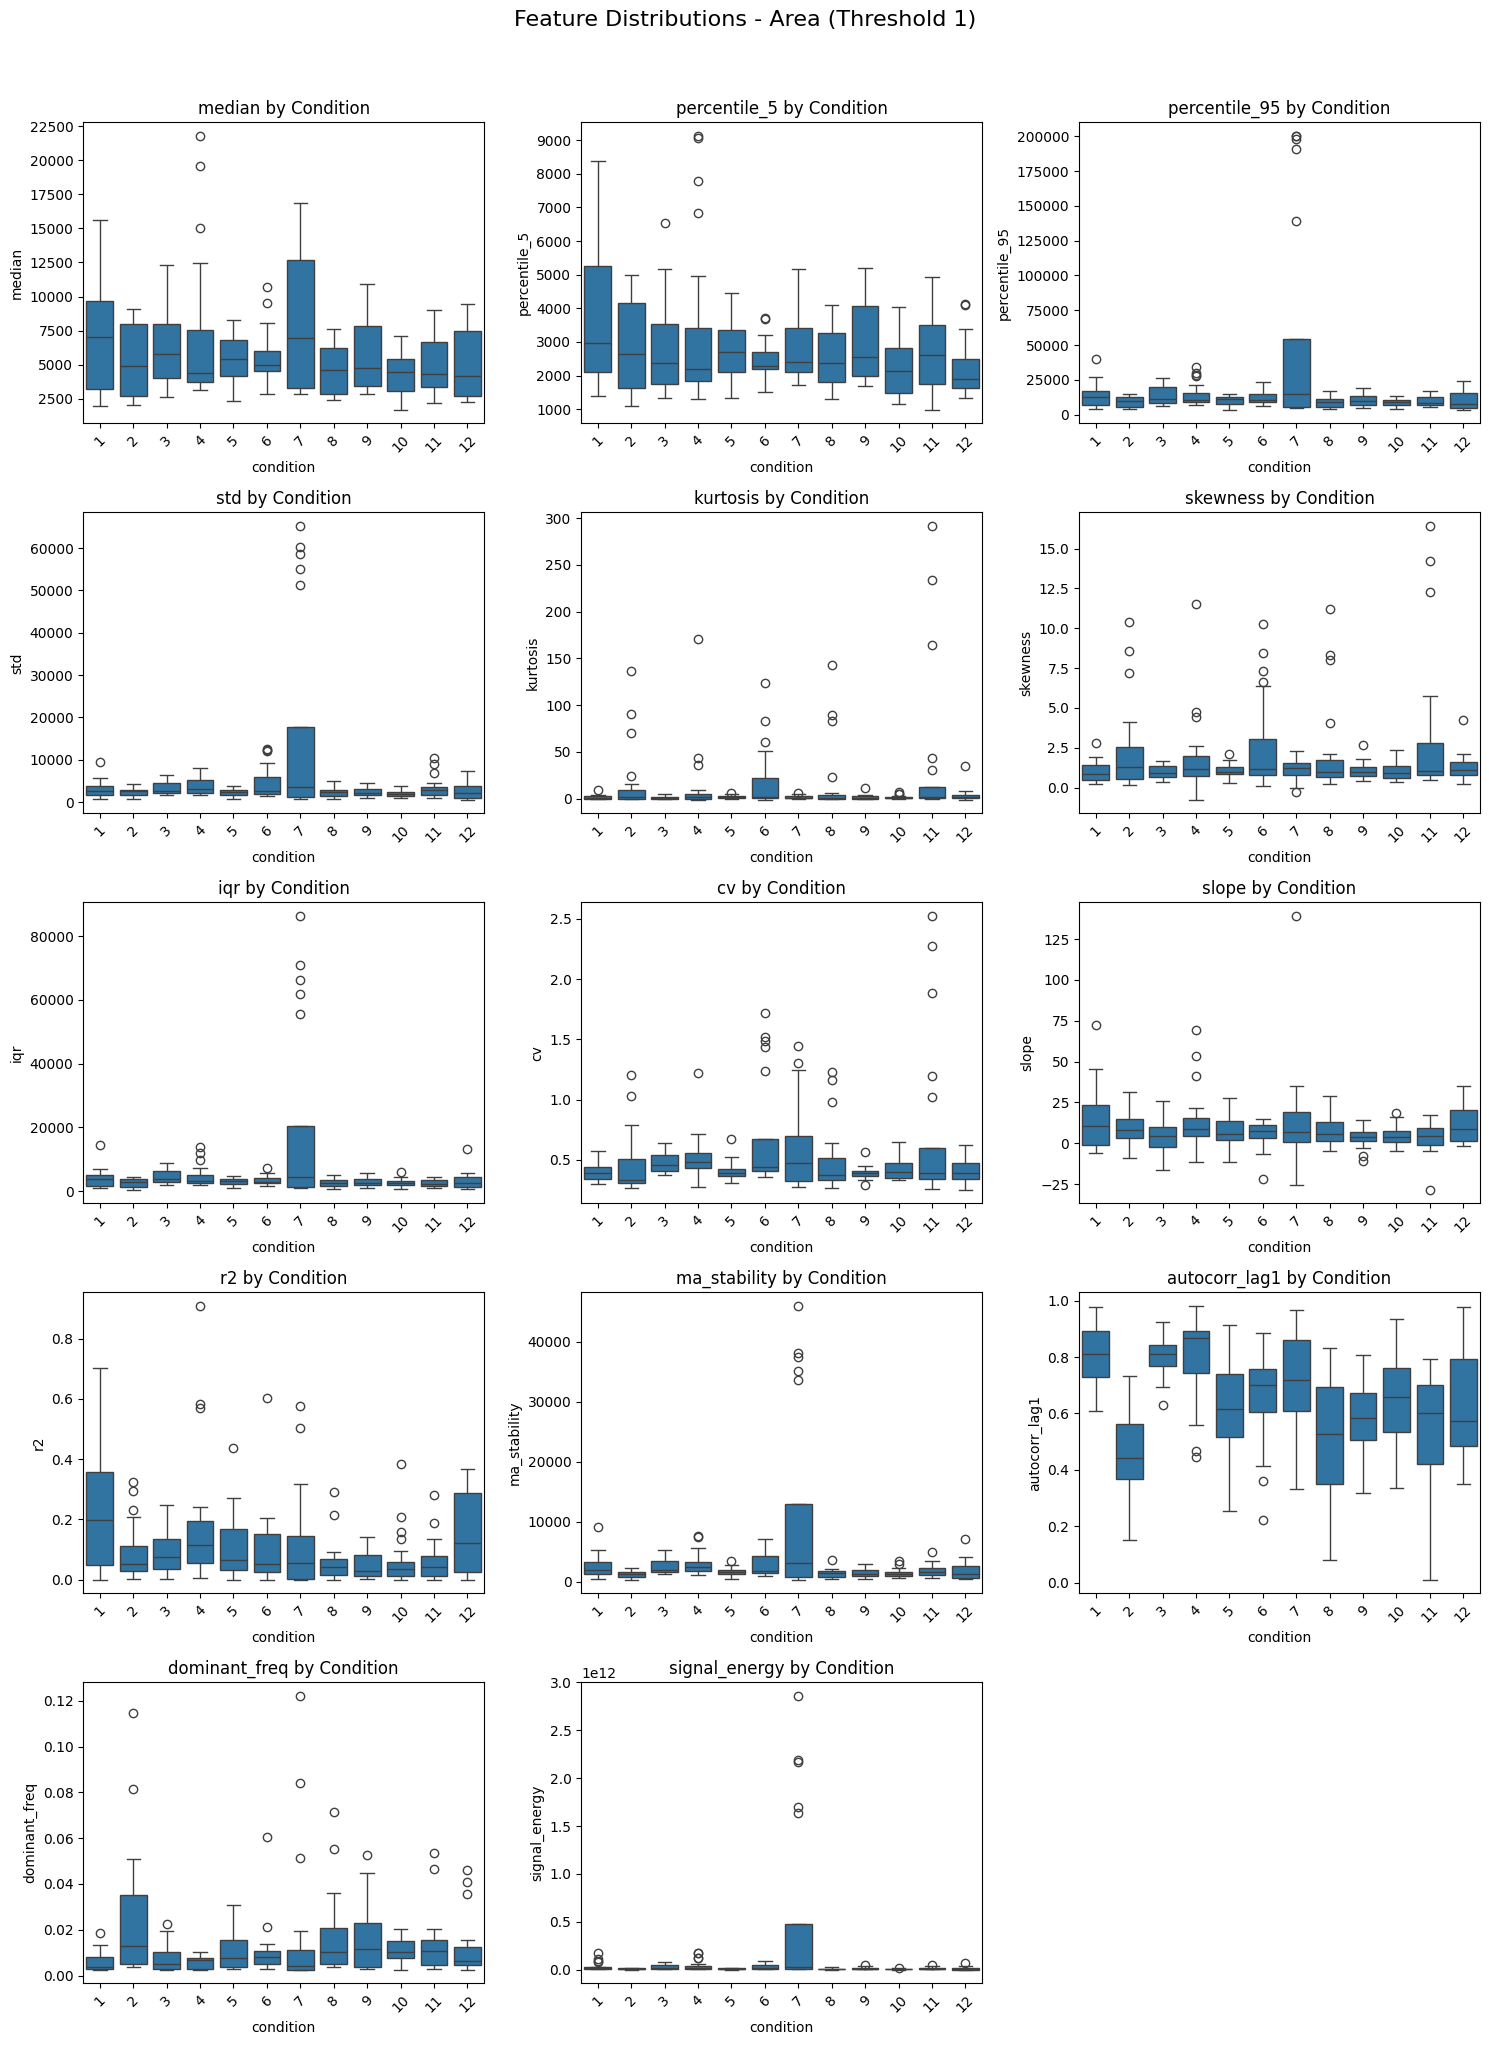

In [7]:
# See how features are distributed across conditions
visualizer.plot_feature_distributions(feature_type='area', threshold=1)
plt.show()

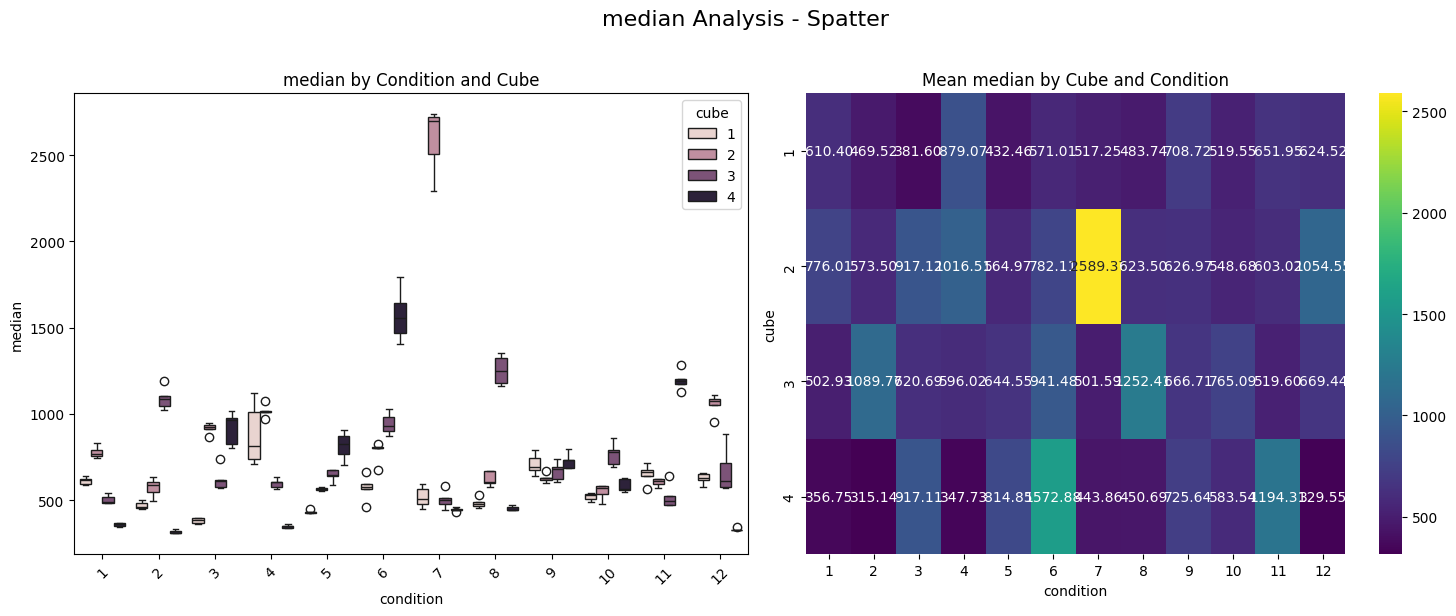

In [8]:
# Compare median values across conditions
visualizer.plot_condition_comparison('median', feature_type='spatter')
plt.show()

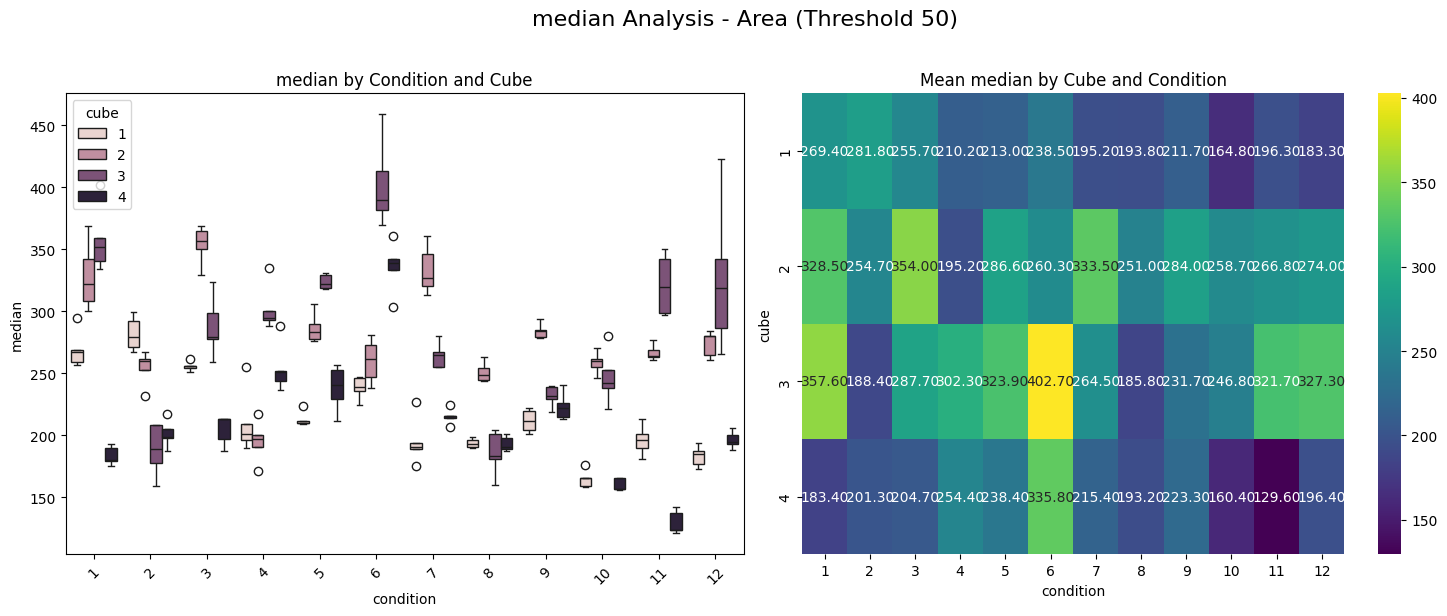

In [9]:
# Compare median values across conditions
visualizer.plot_condition_comparison('median', feature_type='area')
plt.show()

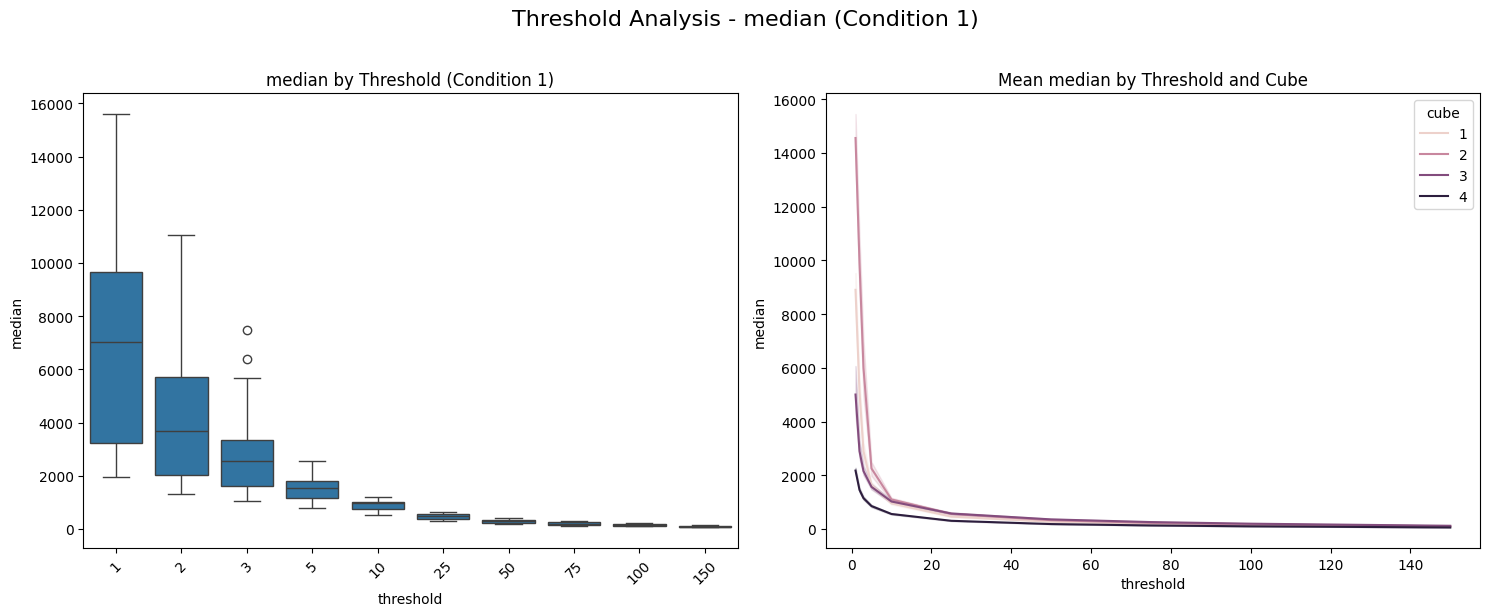

In [10]:
# For area features, compare across thresholds
visualizer.plot_threshold_comparison('median', condition=1)
plt.show()

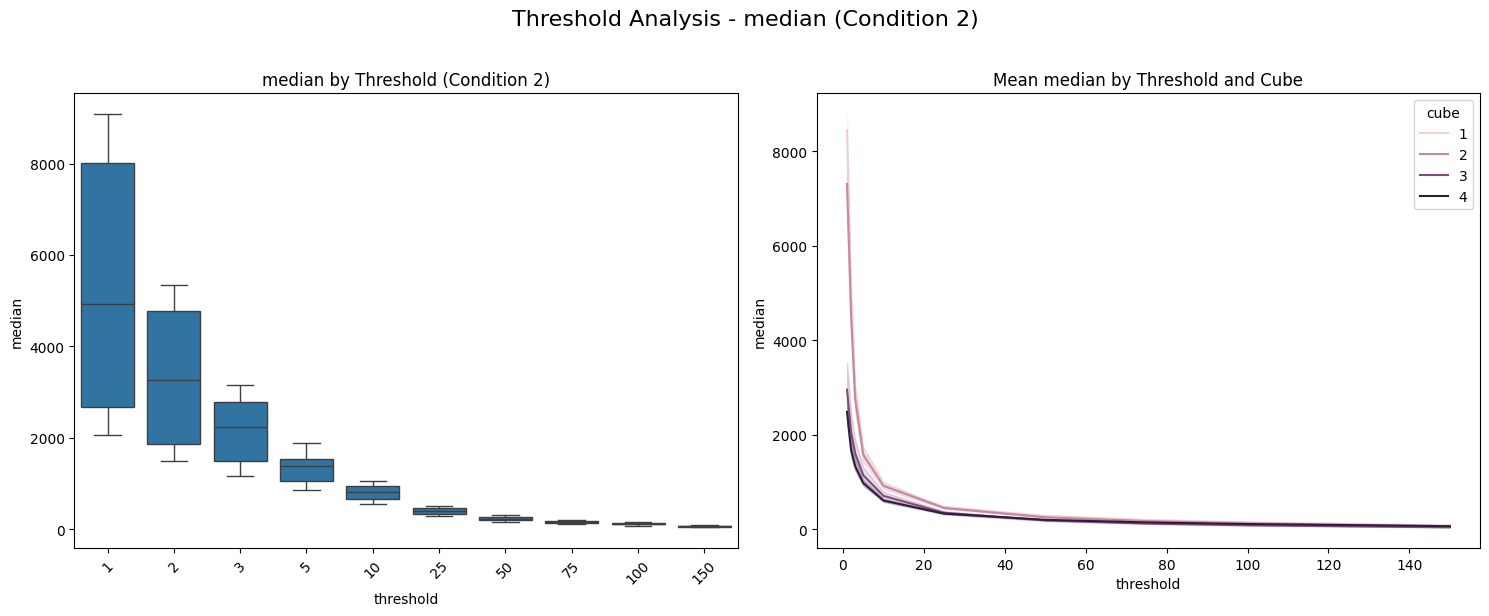

In [11]:
# For area features, compare across thresholds
visualizer.plot_threshold_comparison('median', condition=2)
plt.show()

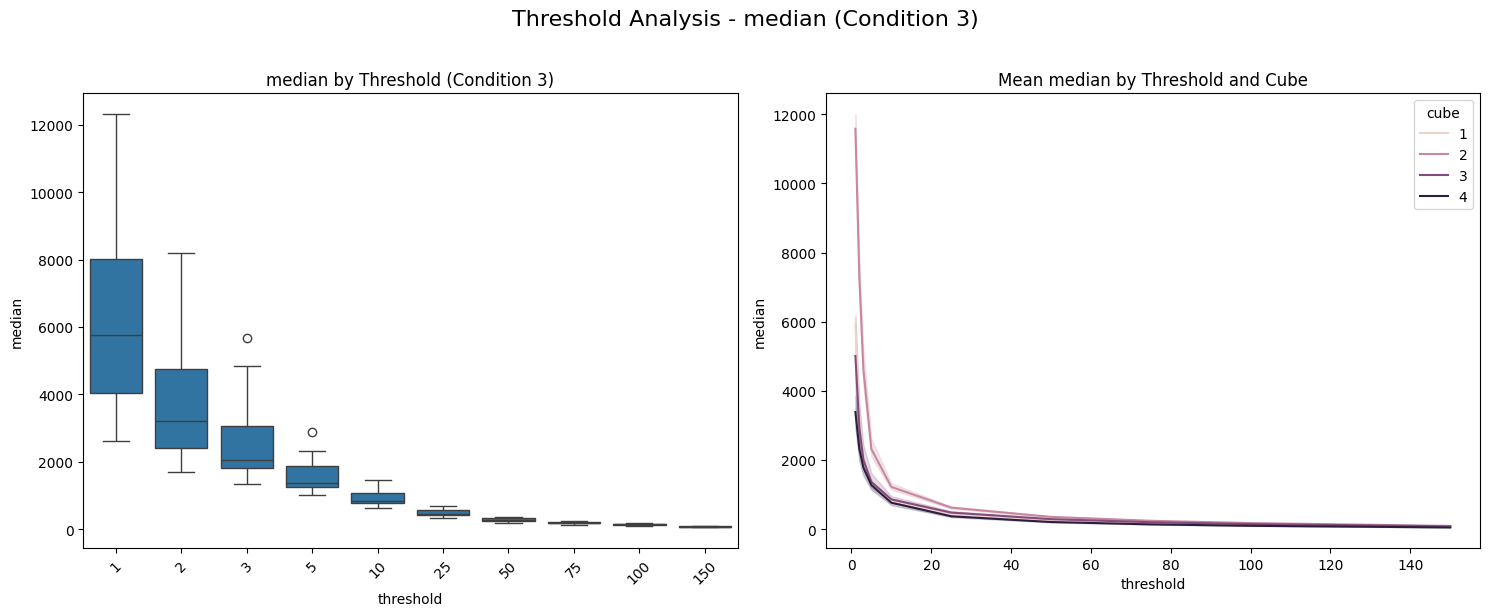

In [12]:
# For area features, compare across thresholds
visualizer.plot_threshold_comparison('median', condition=3)
plt.show()

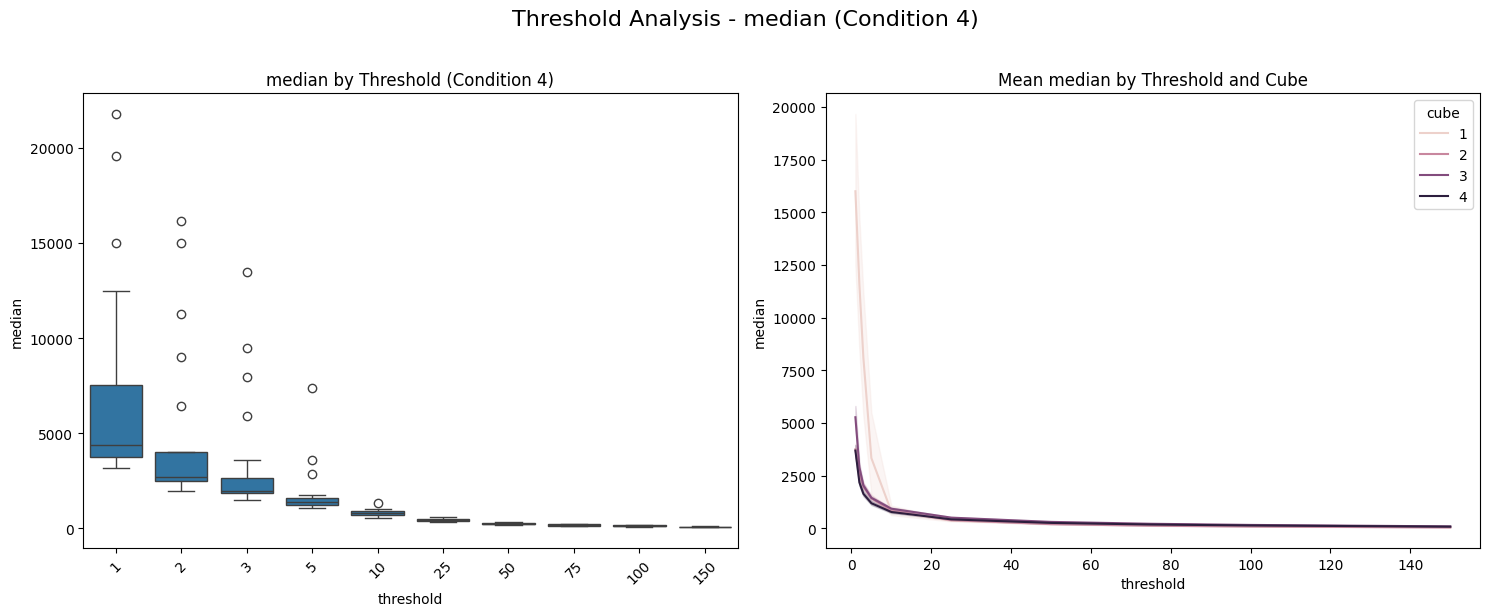

In [13]:
# For area features, compare across thresholds
visualizer.plot_threshold_comparison('median', condition=4)
plt.show()

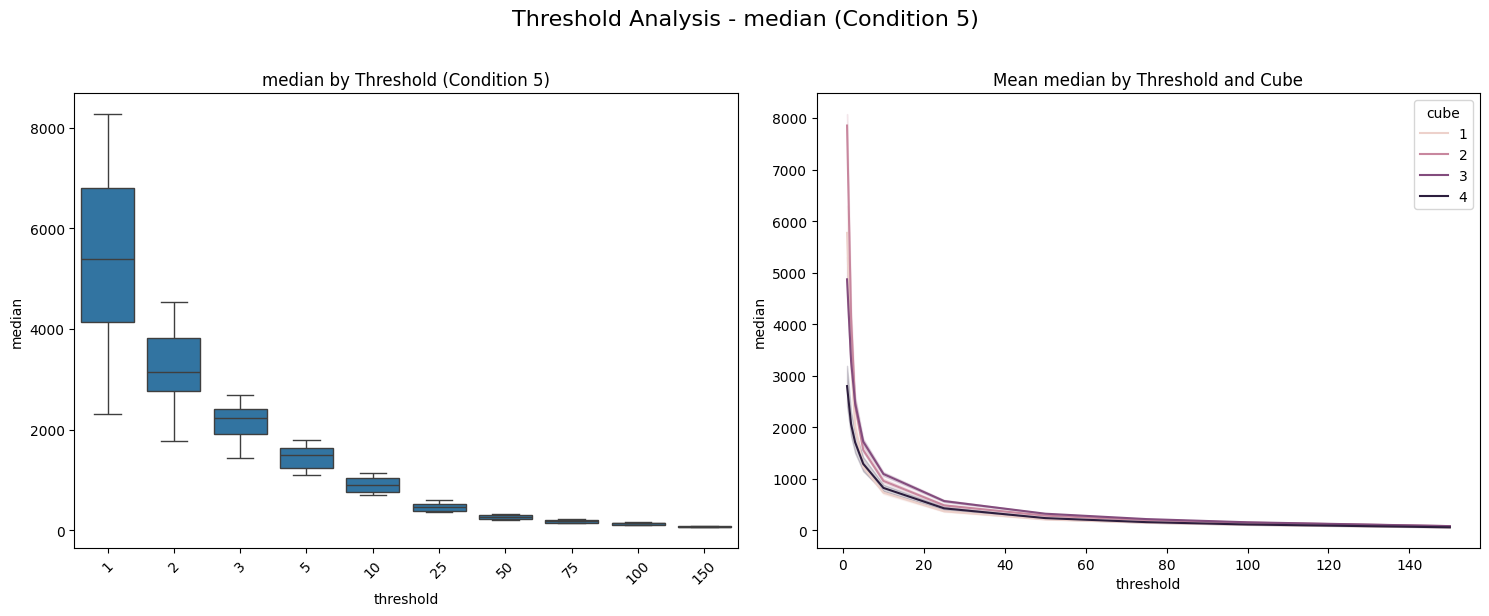

In [14]:
# For area features, compare across thresholds
visualizer.plot_threshold_comparison('median', condition=5)
plt.show()